# Relatório de Análise VIII - Identificando e Removendo Outliers

## Identificando e removendo outliers

In [27]:
#Importando e configurando as bibliotecas
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [28]:
#Leitura da Database e armazenamento em objeto
dados = pd.read_csv("Dados/aluguel_Residencial.csv", sep=";")
dados.head(5)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Leblon,2,0,0,70,3000.0,760.0,0.0,42.86,Apartamento
1,Apartamento,Ipanema,4,2,2,210,28000.0,3020.0,9247.0,133.33,Apartamento
2,Apartamento,Flamengo,3,0,0,115,2700.0,728.0,223.0,23.48,Apartamento
3,Apartamento,Bento Ribeiro,2,1,0,53,900.0,510.0,0.0,16.98,Apartamento
4,Apartamento,Leblon,4,3,1,178,15000.0,3000.0,0.0,84.27,Apartamento


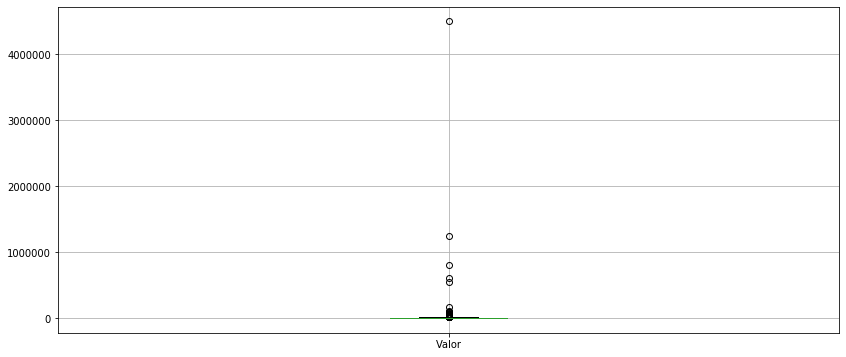

In [29]:
dados.boxplot(['Valor'])

In [30]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
1190,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
2297,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
7515,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento
15404,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
19926,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa


In [31]:
valor = dados['Valor']
valor

0         3000.0
1        28000.0
2         2700.0
3          900.0
4        15000.0
          ...   
21821     1100.0
21822     1080.0
21823     1300.0
21824     1300.0
21825     1700.0
Name: Valor, Length: 21826, dtype: float64

In [32]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limiteInferior = Q1 - 1.5 * IIQ
limiteSuperior = Q3 + 1.5 * IIQ

In [33]:
selecao = (valor >= limiteInferior) & (valor <= limiteSuperior)
dados_new = dados[selecao]
dados_new

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Leblon,2,0,0,70,3000.0,760.0,0.0,42.86,Apartamento
2,Apartamento,Flamengo,3,0,0,115,2700.0,728.0,223.0,23.48,Apartamento
3,Apartamento,Bento Ribeiro,2,1,0,53,900.0,510.0,0.0,16.98,Apartamento
5,Apartamento,Barra da Tijuca,2,1,1,94,2200.0,1379.0,252.0,23.40,Apartamento
6,Apartamento,Cachambi,2,1,0,70,1300.0,550.0,0.0,18.57,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21821,Quitinete,Copacabana,1,0,0,30,1100.0,528.0,0.0,36.67,Apartamento
21822,Quitinete,Copacabana,1,0,0,27,1080.0,450.0,54.0,40.00,Apartamento
21823,Quitinete,Copacabana,0,0,0,22,1300.0,300.0,24.0,59.09,Apartamento
21824,Quitinete,Copacabana,1,0,0,24,1300.0,450.0,0.0,54.17,Apartamento


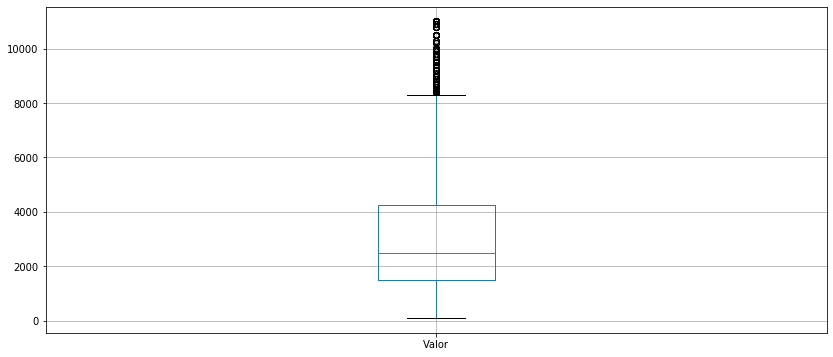

In [34]:
dados_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000002071EBB7C8>]],
      dtype=object)

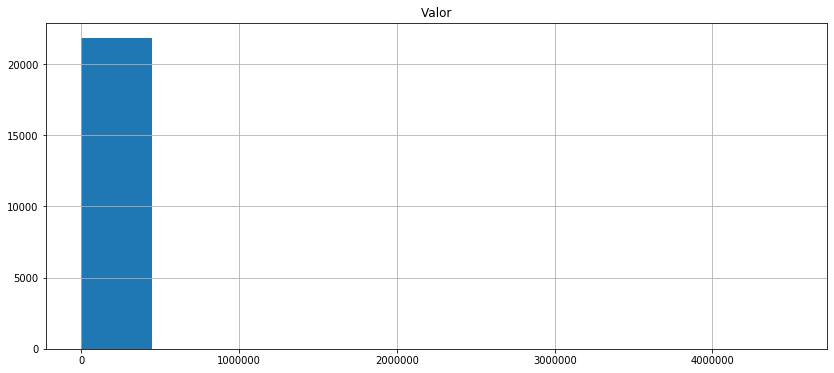

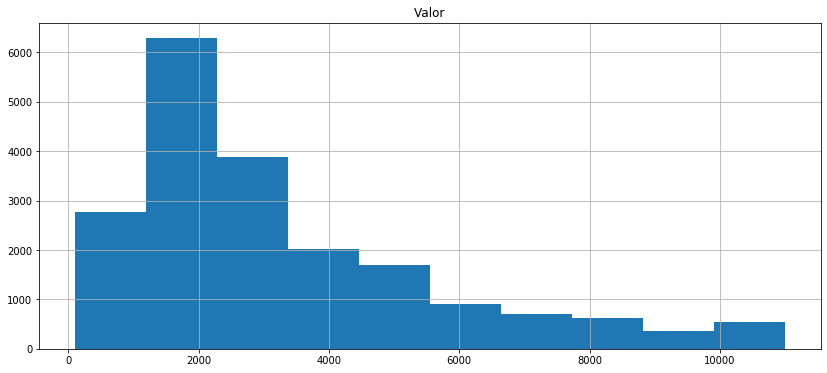

In [35]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

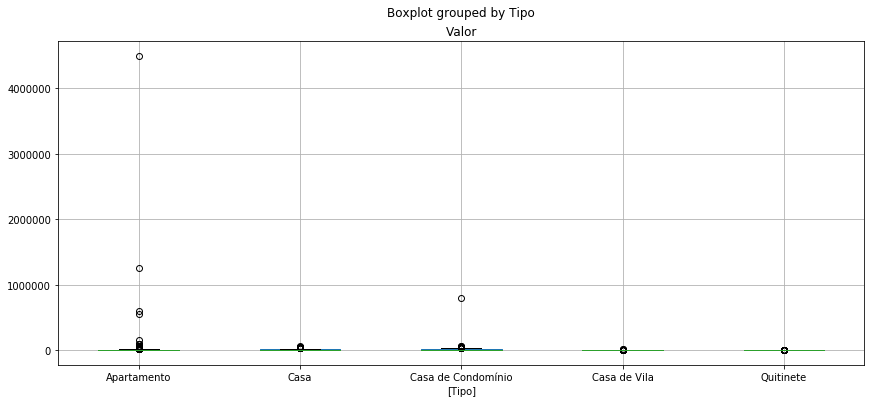

In [36]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [37]:
grupoTipo = dados.groupby('Tipo')['Valor']
type(grupoTipo)

pandas.core.groupby.generic.SeriesGroupBy

In [40]:
Q1 = grupoTipo.quantile(.25)
Q3 = grupoTipo.quantile(.75)
IIQ = Q3 - Q1
limiteInferior = Q1 - 1.5 * IIQ
limiteSuperior = Q3 + 1.5 * IIQ

In [43]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [44]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [45]:
IIQ

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [46]:
limiteInferior

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [48]:
limiteSuperior

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [51]:
dados_new = pd.DataFrame()
dados_new

""


In [53]:
for tipo in grupoTipo.groups.keys():
    bTipo = dados['Tipo'] == tipo
    dentroLimite = (dados['Valor'] >= limiteInferior[tipo]) & (dados['Valor'] <= limiteSuperior[tipo])
    selecao = bTipo & dentroLimite
    dados_new = pd.concat([dados_new,dados[selecao]])

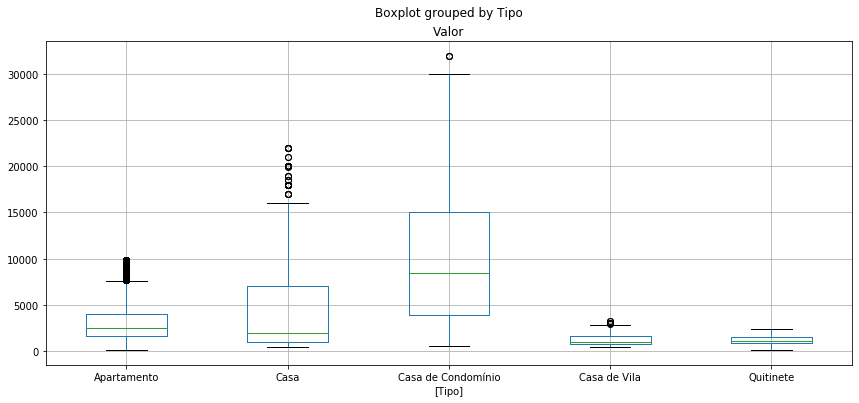

In [54]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [55]:
dados_new.to_csv("Dados/aluguel_Residencial_noOutliers.csv", sep=";", index = False )